In [6]:
import numpy as np 
import pandas as pd 
from sklearn import ensemble
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv("mn_crimes_and_schools.csv")

In [8]:
data.head()

,tax_value,last_sold_price,property_size,zestimate_amount,bathrooms,zestimate_valuation_range_high,tax_year,zestimate_value_change,latitude,zestimate_percentile,...,TOTAL MISDEMEANOR OFFENSES_last_3_years,TOTAL MISDEMEANOR OFFENSES_percent_change,TOTAL NON-SEVEN MAJOR FELONY OFFENSES_last_3_years,TOTAL NON-SEVEN MAJOR FELONY OFFENSES_percent_change,TOTAL SEVEN MAJOR FELONY OFFENSES_last_3_years,TOTAL SEVEN MAJOR FELONY OFFENSES_percent_change,UNAUTHORIZED USE OF A VEHICLE_last_3_years,UNAUTHORIZED USE OF A VEHICLE_percent_change,VEHICLE AND TRAFFIC LAWS_last_3_years,VEHICLE AND TRAFFIC LAWS_percent_change
0,NaN,NaN,NaN,849427.0,1.0,1044795.0,NaN,NaN,40.724448,0.0,...,4072.666667,11.540689,678.666667,0.342633,1364.0,1.539942,5.333333,15.789474,39.333333,-8.256881
1,1642000.0,NaN,2250.0,NaN,2.0,NaN,2015.0,NaN,40.724420,0.0,...,4072.666667,11.540689,678.666667,0.342633,1364.0,1.539942,5.333333,15.789474,39.333333,-8.256881
2,1674000.0,NaN,2250.0,7332356.0,1.0,7992268.0,2015.0,NaN,40.724385,0.0,...,4072.666667,11.540689,678.666667,0.342633,1364.0,1.539942,5.333333,15.789474,39.333333,-8.256881
3,NaN,NaN,NaN,1991289.0,1.0,2708153.0,NaN,NaN,40.724332,0.0,...,4072.666667,11.540689,678.666667,0.342633,1364.0,1.539942,5.333333,15.789474,39.333333,-8.256881
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.724845,0.0,...,4072.666667,11.540689,678.666667,0.342633,1364.0,1.539942,5.333333,15.789474,39.333333,-8.256881


In [9]:
data = data[np.isfinite(data['zestimate_amount'])]

In [10]:
data_with_dummies = pd.read_csv("cleaned_data_imputed.csv")

In [11]:
data_with_dummies.columns.values

array(['property_size', 'zestimate_amount', 'bathrooms', 'tax_year',
       'latitude', 'bedrooms', 'year_built', 'home_size', 'longitude',
       'schools_Number Tested', 'schools_Mean ELA Score',
       'schools_Mean Math Score', 'schools_mean score',
       'ADMINISTRATIVE CODE_last_3_years',
       'ADMINISTRATIVE CODE_percent_change',
       'AGGRAVATED HARASSMENT 2_last_3_years',
       'AGGRAVATED HARASSMENT 2_percent_change', 'ARSON_last_3_years',
       'ARSON_percent_change',
       'ASSAULT 3 AND RELATED OFFENSES_last_3_years',
       'ASSAULT 3 AND RELATED OFFENSES_percent_change',
       'BURGLARY_last_3_years', 'BURGLARY_percent_change',
       'CRIMINAL TRESPASS_last_3_years',
       'CRIMINAL TRESPASS_percent_change',
       'FEL. CRIMINAL MISCHIEF & RELATED OFFENSES_last_3_years',
       'FEL. CRIMINAL MISCHIEF & RELATED OFFENSES_percent_change',
       'FELONY ASSAULT_last_3_years', 'FELONY ASSAULT_percent_change',
       'FELONY DANGEROUS DRUGS_last_3_years',
       

In [12]:
def get_precinct (neighborhood):
    subset = data[data['neighborhood'] == neighborhood]
    precincts = subset['precinct'].unique()
    len_list = []
    for precinct in precincts:
        length = len(subset[subset['precinct'] == precinct])
        len_list += [length]
    max_ind = np.argmax(len_list)
    max_precinct = precincts[max_ind]
    
    return max_precinct

In [13]:
def get_schooldist (neighborhood):
    subset = data[data['neighborhood'] == neighborhood]
    schooldists = subset['schooldistrict'].unique()
    len_list = []
    for schooldist in schooldists:
        length = len(subset[subset['schooldistrict'] == schooldist])
        len_list += [length]
    max_ind = np.argmax(len_list)
    max_schooldist = schooldists[max_ind]
    
    return max_schooldist

In [14]:
def get_feature (neighborhood, home_type, feature):
    subset = data_with_dummies[data_with_dummies[neighborhood] == 1]
    subset = subset[subset[home_type] == 1]
    subset = subset[np.isfinite(subset[feature])]
    med = np.median(subset[feature])
    
    return med

In [15]:
data_with_dummies = data_with_dummies.drop('zestimate_amount', 1)

In [16]:
df = pd.DataFrame(columns=data_with_dummies.columns.values)

In [17]:
# create a set of all neighborhoods we have data for
our_mn_regions = set(data["neighborhood"].unique())

import json
# create a set of neighborhood our zillow shapefile contains
with open('manhattan.geojson') as f:
    data = json.load(f)

zillow_mn_regions = set()
for feature in data['features']:
    zillow_mn_regions.add(feature['properties']['NAME'])
    
NEIGHBORHOODS_TO_DROP = our_mn_regions.difference(zillow_mn_regions)
# this is a set -- if you want a list just do list(NEIGHBORHOODS_TO_DROP)


In [18]:
data = pd.read_csv("mn_crimes_and_schools.csv")
neighborhoods = list(data['neighborhood'].unique())
for neigh in list(NEIGHBORHOODS_TO_DROP):
    if neigh in neighborhoods:
        neighborhoods.remove(neigh)

In [19]:
used_neighborhoods = []

for neigh in neighborhoods:
    val = "neighborhood_" + neigh
    if val in data_with_dummies.columns.values:
        used_neighborhoods += [val]

In [20]:
home_types = data['home_type'].unique()

# get rid of nan
home_types = home_types[:13]

used_home_types = []

for ht in home_types:
    val = "home_type_" + ht
    if val in data_with_dummies.columns.values:
        used_home_types += [val]

In [21]:
num_cols = data_with_dummies.shape[1]

In [22]:
for i in range(len(df.columns.values)):
    if df.columns.values[i] == 'neighborhood_Astoria-Long Island City':
        print i

97


In [23]:
used_neighborhoods = sorted(used_neighborhoods)

In [24]:
ind = 0

hometypes_bed_bath = {"home_type_Apartment": [(1,1), (2,1), (3,1)], "home_type_Condominium": [(2, 1.5)], \
             "home_type_Cooperative": [(2,1)], "home_type_Duplex": [(2,2.25)], "home_type_MultiFamily2To4": [(1,1)], \
             "home_type_Quadruplex": [(1,1)], "home_type_SingleFamily": [(2,2)], "home_type_Townhouse": [(4,3)], 
                      "home_type_Miscellaneous": [(1,1)], "home_type_Unknown": [(1,1)], "home_type_MultiFamily5Plus": [(2,1)],
                     "home_type_Triplex": [(2,1)], "home_type_Mobile": [(1.5, 1.5)]}

for neighborhood in used_neighborhoods:
    for home_type in used_home_types:
        if neighborhood in data_with_dummies.columns.values:
            row = [0] * num_cols
            neigh_ind = used_neighborhoods.index(neighborhood)
            home_ind = used_home_types.index(home_type)
            # fill in home type
            row[home_ind + 84] = 1
            # fill in neighborhood
            row[neigh_ind + 97] = 1
            # fill in bathrooms and bedrooms
            beds = hometypes_bed_bath[home_type][0][0]
            baths = hometypes_bed_bath[home_type][0][1]
            row[1] = baths
            row[4] = beds
            # fill in the rest of the features imputing with the median
            for i in range(num_cols):
                if (i != 1) & (i != 4):
                    row[i] = get_feature(neighborhood, home_type, data_with_dummies.columns.values[i])
            df.loc[ind] = row

            ind += 1   

In [25]:
home_type = "home_type_Apartment"
ind = len(df)
apartment_bedrooms = [(2,1), (3,1)]

for size in apartment_bedrooms:
    for neighborhood in used_neighborhoods:
        if neighborhood in data_with_dummies.columns.values:
            row = [0] * num_cols
            neigh_ind = used_neighborhoods.index(neighborhood)
            # fill in home type
            row[84] = 1
            # fill in neighborhood
            row[neigh_ind + 97] = 1
            # fill in bathrooms and bedrooms
            beds = size[0]
            baths = size[1]
            row[1] = baths
            row[4] = beds
            # fill in the rest of the predictors imputing with the median
            for i in range(num_cols):
                if (i != 1) & (i != 4):
                    row[i] = get_feature(neighborhood, home_type, data_with_dummies.columns.values[i])
            df.loc[ind] = row

            ind += 1   


In [26]:
df = df.dropna()

In [27]:
len(df)

298

In [28]:
df.to_csv("df_to_predict.csv", index = False)

In [29]:
## Loading Data 
test_data = pd.read_csv("test_imputed.csv")
train_data = pd.read_csv("train_imputed.csv")

In [30]:
## Separating our predictor and response variables 
x_train = train_data.drop(['zestimate_amount'],1)
y_train = train_data['zestimate_amount']
x_test = test_data.drop(['zestimate_amount'],1)
y_test = test_data['zestimate_amount']

In [31]:
## To fit model on entire data set 
x = pd.concat([x_train, x_test])
y = pd.concat([y_train, y_test]) 

In [32]:
model = ensemble.RandomForestRegressor(n_estimators=90, max_depth=40)
model.fit(x, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=90, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [33]:
predictions = model.predict(df)

In [34]:
df["predictions"] = predictions

In [35]:
df.head()

,property_size,bathrooms,tax_year,latitude,bedrooms,year_built,home_size,longitude,schools_Number Tested,schools_Mean ELA Score,...,neighborhood_Sunny Side,neighborhood_Tremont,neighborhood_Tribeca,neighborhood_Upper East Side,neighborhood_Upper West Side,neighborhood_Washington Heights,neighborhood_West Village,neighborhood_Williamsburg,neighborhood_Yorkville,predictions
0,2000.0,1.0,2015.0,40.716257,1.0,2000.5,887.5,-74.016409,15070.0,326.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.751425e+06
1,2000.0,1.0,2015.0,40.718320,1.0,1910.0,3380.0,-74.014180,15070.0,326.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.658799e+06
4,14457.0,1.5,2015.0,40.709596,2.0,1988.0,1016.0,-74.017000,15070.0,326.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.765280e+06
5,1803.5,2.0,2015.0,40.728474,2.0,1910.0,3380.0,-74.056971,15070.0,326.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.176335e+05
13,2000.0,1.0,2015.0,40.783010,1.0,1910.0,1992.0,-73.954399,15070.0,326.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.586152e+06


In [36]:
df[df['home_type_Apartment']==1]

,property_size,bathrooms,tax_year,latitude,bedrooms,year_built,home_size,longitude,schools_Number Tested,schools_Mean ELA Score,...,neighborhood_Sunny Side,neighborhood_Tremont,neighborhood_Tribeca,neighborhood_Upper East Side,neighborhood_Upper West Side,neighborhood_Washington Heights,neighborhood_West Village,neighborhood_Williamsburg,neighborhood_Yorkville,predictions
1,2000.0,1.0,2015.0,40.718320,1.0,1910.0,3380.0,-74.014180,15070.0,326.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.658799e+06
14,2000.0,1.0,2015.0,40.782490,1.0,1923.0,3380.0,-73.954490,15070.0,326.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.686254e+06
40,2000.0,1.0,2015.0,40.744540,1.0,1910.0,3380.0,-74.000890,15070.0,326.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.269149e+06
53,2000.0,1.0,2015.0,40.717105,1.0,1910.0,3380.0,-73.997686,15070.0,326.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.455355e+06
66,2000.0,1.0,2015.0,40.759850,1.0,1910.0,3380.0,-73.990295,15070.0,326.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.103624e+06
92,2000.0,1.0,2015.0,40.727255,1.0,1910.0,3380.0,-73.983392,4581.0,307.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.257226e+06
105,2000.0,1.0,2015.0,40.708175,1.0,1910.0,3380.0,-74.009535,15070.0,326.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.774996e+06
131,2000.0,1.0,2015.0,40.739550,1.0,1910.0,3380.0,-73.981120,15070.0,326.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.525001e+05
144,2000.0,1.0,2015.0,40.731570,1.0,1910.0,3380.0,-73.998390,15070.0,326.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.361813e+06
157,2000.0,1.0,2015.0,40.827404,1.0,1910.0,607.0,-73.947944,9960.0,294.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.507962e+05


In [37]:
len(df)

298

In [38]:
neigh_list = np.empty(len(df), dtype = object)
ht_list = np.empty(len(df), dtype = object)

ind = 0
for i in df.index.values:
    for neighborhood in used_neighborhoods:
        if neighborhood in data_with_dummies.columns.values:
            if df.loc[i][neighborhood] == 1.0:
                neigh_list[ind] = neighborhood.split("_")[1]
                ind += 1
    
ind = 0
for i in df.index.values:
    for home_type in used_home_types:
        if df.loc[i][home_type] == 1:
            if home_type == "home_type_Apartment":
                ht_list[ind] = "Apartment - " + str(int(df.loc[i]['bedrooms'])) + " bedrooms"
            else:
                ht_list[ind] = home_type.split("_")[2]
            ind += 1
            

In [39]:
results_df = pd.DataFrame(neigh_list, columns = ["neighborhood"])
results_df["home_type"] = ht_list
results_df["predicted_price"] = predictions

In [40]:
results_df

,neighborhood,home_type,predicted_price
0,Battery Park,MultiFamily2To4,1.751425e+06
1,Battery Park,Apartment - 1 bedrooms,1.658799e+06
2,Battery Park,Condominium,1.765280e+06
3,Battery Park,SingleFamily,6.176335e+05
4,Carnegie Hill,MultiFamily2To4,3.586152e+06
5,Carnegie Hill,Apartment - 1 bedrooms,1.686254e+06
6,Carnegie Hill,Cooperative,7.247921e+06
7,Carnegie Hill,Condominium,2.716106e+06
8,Carnegie Hill,SingleFamily,9.005850e+06
9,Carnegie Hill,Duplex,8.228979e+06


In [41]:
results_df.to_csv("results_df.csv", index = False)

In [42]:
results_df['home_type'].unique()

array(['MultiFamily2To4', 'Apartment - 1 bedrooms', 'Condominium',
       'SingleFamily', 'Cooperative', 'Duplex', 'Townhouse', 'Quadruplex',
       'Triplex', 'Miscellaneous', 'Unknown', 'MultiFamily5Plus', 'Mobile',
       'Apartment - 2 bedrooms', 'Apartment - 3 bedrooms'], dtype=object)

In [54]:
results_df = results_df.sort(["neighborhood", "home_type"], ascending= True)

In [55]:
results_df

,neighborhood,home_type,predicted_price
1,Battery Park,Apartment - 1 bedrooms,1.565486e+06
258,Battery Park,Apartment - 2 bedrooms,1.865463e+06
278,Battery Park,Apartment - 3 bedrooms,1.944769e+06
2,Battery Park,Condominium,2.006686e+06
0,Battery Park,MultiFamily2To4,1.457620e+06
3,Battery Park,SingleFamily,9.554048e+05
5,Carnegie Hill,Apartment - 1 bedrooms,1.538475e+06
259,Carnegie Hill,Apartment - 2 bedrooms,1.434477e+06
279,Carnegie Hill,Apartment - 3 bedrooms,1.467548e+06
7,Carnegie Hill,Condominium,2.750870e+06


In [56]:
results_df['home_type'].unique()

array(['Apartment - 1 bedrooms', 'Apartment - 2 bedrooms',
       'Apartment - 3 bedrooms', 'Condominium', 'MultiFamily2To4',
       'SingleFamily', 'Cooperative', 'Duplex', 'Miscellaneous',
       'Quadruplex', 'Townhouse', 'Triplex', 'MultiFamily5Plus', 'Unknown',
       'Mobile'], dtype=object)

In [57]:
results_df = pd.read_csv("data/results_df.csv")

In [58]:
results_df["home_type"].unique()

array(['MultiFamily2To4', 'Apartment - 1 bedrooms', 'Condominium',
       'SingleFamily', 'Cooperative', 'Duplex', 'Townhouse', 'Quadruplex',
       'Triplex', 'Miscellaneous', 'Unknown', 'MultiFamily5Plus', 'Mobile',
       'Apartment - 2 bedrooms', 'Apartment - 3 bedrooms'], dtype=object)

In [67]:
results_df.sort(["neighborhood", "home_type"], ascending= True).reindex()

,neighborhood,home_type,predicted_price
1,Battery Park,Apartment - 1 bedrooms,1.565486e+06
258,Battery Park,Apartment - 2 bedrooms,1.865463e+06
278,Battery Park,Apartment - 3 bedrooms,1.944769e+06
2,Battery Park,Condominium,2.006686e+06
0,Battery Park,MultiFamily2To4,1.457620e+06
3,Battery Park,SingleFamily,9.554048e+05
5,Carnegie Hill,Apartment - 1 bedrooms,1.538475e+06
259,Carnegie Hill,Apartment - 2 bedrooms,1.434477e+06
279,Carnegie Hill,Apartment - 3 bedrooms,1.467548e+06
7,Carnegie Hill,Condominium,2.750870e+06


In [72]:
results_df.index = range(1,len(results_df) + 1)

In [73]:
results_df

,neighborhood,home_type,predicted_price
1,Battery Park,Apartment - 1 bedrooms,1.565486e+06
2,Battery Park,Apartment - 2 bedrooms,1.865463e+06
3,Battery Park,Apartment - 3 bedrooms,1.944769e+06
4,Battery Park,Condominium,2.006686e+06
5,Battery Park,MultiFamily2To4,1.457620e+06
6,Battery Park,SingleFamily,9.554048e+05
7,Carnegie Hill,Apartment - 1 bedrooms,1.538475e+06
8,Carnegie Hill,Apartment - 2 bedrooms,1.434477e+06
9,Carnegie Hill,Apartment - 3 bedrooms,1.467548e+06
10,Carnegie Hill,Condominium,2.750870e+06


In [69]:
results_df = results_df.sort(["neighborhood", "home_type"], ascending= True).reindex()

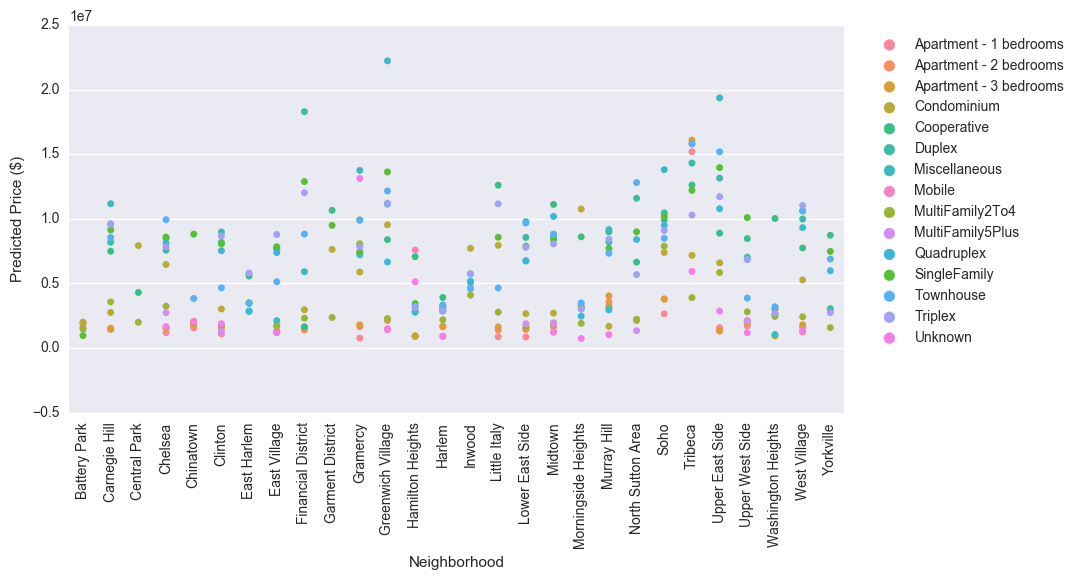

In [74]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.stripplot(results_df["neighborhood"], results_df["predicted_price"], results_df["home_type"])
ax.set_xticklabels(results_df["neighborhood"].unique(), rotation=90)
ax.set_xlabel("Neighborhood")
ax.set_ylabel("Predicted Price ($)")

handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, bbox_to_anchor=(1.3, 1))

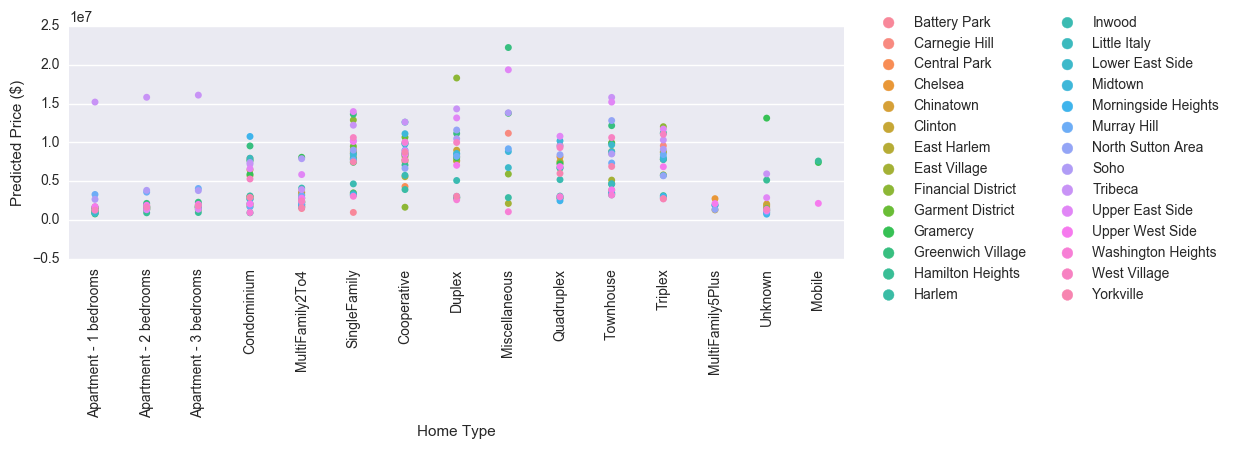

In [85]:
fig, ax = plt.subplots(figsize=(10,3))
ax = sns.stripplot(results_df["home_type"], results_df["predicted_price"], results_df["neighborhood"])
ax.set_xticklabels(results_df["home_type"].unique(), rotation=90)
ax.set_xlabel("Home Type")
ax.set_ylabel("Predicted Price ($)")
ax.legend(bbox_to_anchor=(1.5, 1.1), ncol=2)